# Cat 🐱 vs Dog 🐶 Image Classification.

In [ ]:
# Convolutional Neural Network (CNN) in Machine Learning

In [8]:
# You will find dogs_vs_cats zip file in this repo download.

# Extract data from Zip
import zipfile
zip_ref = zipfile.ZipFile('')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
# Load Libraries and Dataset
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import glob
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt


# Load Dataset Location

# Locate your files which has cat dog images

train_dir = '/content/dogs_vs_cats/train'
test_dir = '/content/dogs_vs_cats/test'

# CUDA GPU
device = torch.device('cuda')

# Define data transforms
transform = transforms.Compose([transforms.Resize((128, 128)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))])

# Create dataloader
train_loader = DataLoader(datasets.ImageFolder(root=train_dir, transform=transform), batch_size=32, shuffle=True)
test_loader = DataLoader(datasets.ImageFolder(root=test_dir, transform=transform), batch_size=32, shuffle=True)

# Weights of Neural Network
class CatDogModel(nn.Module):
    def __init__(self):
        super(CatDogModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CatDogModel().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005) # Adam optimization algorithm
criterion = nn.CrossEntropyLoss()

train=len(glob.glob(train_dir+'/**/*.jpg'))
test=len(glob.glob(train_dir+'/**/*.jpg'))

print(f'Train data: {train} | Test data: {test}')

FileNotFoundError: [Errno 2] No such file or directory: '/content/dogs_vs_cats/train'

In [ ]:
losses = []
accuracies = []

# Training
for epoch in range(100):
  train_loss = 0.0
  correct = 0
  total = 0
  model.train()
  optimizer.zero_grad()

  for inputs, labels in train_loader:
    inputs, labels =  inputs.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    train_loss += loss.item()
    loss.backward()
    optimizer.step()

    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  accuracy = 100 * correct / total
  accuracies.append(accuracy)

  train_loss /= len(train_loader)
  losses.append(train_loss)
  print(f'Epoch [{epoch + 1}] Loss: {train_loss:.4f} Accuracy: {accuracy:.2f}')

#Testing
model.eval()
correct = 0
total = 0

with torch.no_grad():
  for inputs, labels in train_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)

    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
  print(f'Testing Accuracy: {accuracy:.2f}%')



Epoch [1] Loss: 0.0142 Accuracy: 99.58
Epoch [2] Loss: 0.0266 Accuracy: 99.06
Epoch [3] Loss: 0.0145 Accuracy: 99.53
Epoch [4] Loss: 0.0051 Accuracy: 99.92
Epoch [5] Loss: 0.0248 Accuracy: 99.15
Epoch [6] Loss: 0.0240 Accuracy: 99.19
Epoch [7] Loss: 0.0154 Accuracy: 99.50
Epoch [8] Loss: 0.0089 Accuracy: 99.73
Epoch [9] Loss: 0.0173 Accuracy: 99.42
Epoch [10] Loss: 0.0116 Accuracy: 99.64
Epoch [11] Loss: 0.0179 Accuracy: 99.45
Epoch [12] Loss: 0.0060 Accuracy: 99.83
Epoch [13] Loss: 0.0172 Accuracy: 99.52
Epoch [14] Loss: 0.0083 Accuracy: 99.80
Epoch [15] Loss: 0.0089 Accuracy: 99.70
Epoch [16] Loss: 0.0127 Accuracy: 99.58
Epoch [17] Loss: 0.0120 Accuracy: 99.56
Epoch [18] Loss: 0.0092 Accuracy: 99.73
Epoch [19] Loss: 0.0069 Accuracy: 99.80
Epoch [20] Loss: 0.0099 Accuracy: 99.64
Epoch [21] Loss: 0.0186 Accuracy: 99.38
Epoch [22] Loss: 0.0041 Accuracy: 99.86
Epoch [23] Loss: 0.0116 Accuracy: 99.62
Epoch [24] Loss: 0.0127 Accuracy: 99.60
Epoch [25] Loss: 0.0042 Accuracy: 99.86
Epoch [26

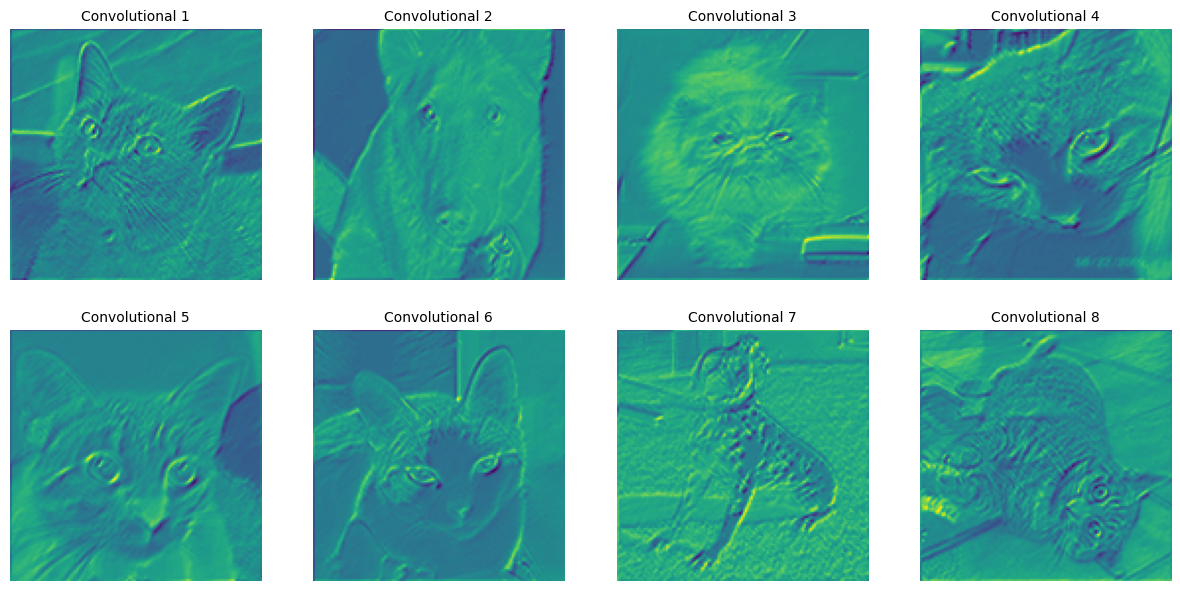

In [ ]:
processed = []
names = []
feature_maps = []

def hook_fn(module, input, output):
    feature_maps.append(output[0])

target_layer = model.conv1

hook = target_layer.register_forward_hook(hook_fn)

with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)

hook.remove()

fig = plt.figure(figsize=(15, 15))
for i in range(8):
    a = fig.add_subplot(4, 4, i+1)
    feature_map = feature_maps[i].cpu().numpy()
    processed.append(feature_map)
    names.append(f"Convolutional {i+1}")
    imgplot = plt.imshow(feature_map[0], cmap='viridis')
    a.axis("off")
    a.set_title(f"Convolutional {i+1}", fontsize=10)

plt.show()

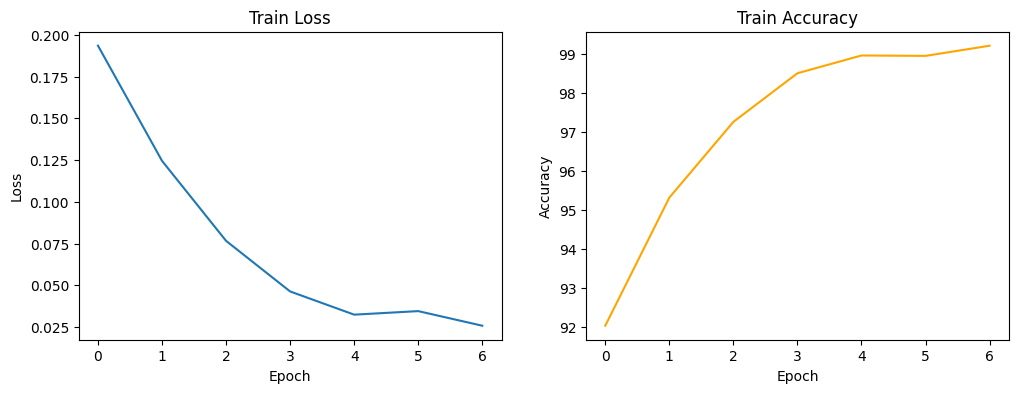

In [ ]:
# Learning Graph

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(losses, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Test Accuracy', color='orange')
plt.title('Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()